# Energetski bilans BiH - 2019.

Energetski bilans BiH je u TJ preuzet sa stranice Međunarodne agencije za energiju https://www.iea.org/data-and-statistics/data-tables?country=BOSNIAHERZ&energy=Balances&year=2019. Naknadno će se prevesti na bosanski.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_excel(r"FILES\BALANCE\bilans2019.xlsx",sheet_name="TJ_2019", header=0,usecols="A:L")

In [3]:
file=file.set_index("TJ")

In [4]:
#prevod na bosanski 
eng_columns=file.columns
bos_columns=["Ugalj","Sirova nafta","Naftni derivati","Prirodni gas","Nuklearna energija","Hidro","Vjetro-,solarna energija itd.","Biogoriva i otpad","El.energija","Toplota", "Ukupno"]
eng_index=['Production', 'Imports', 'Exports', 'International marine bunkers',
       'International aviation bunkers', 'Stock changes', 'TES',
       'Transfers', 'Statistical differences', 'Electricity plants',
       'CHP plants', 'Heat plants', 'Gas works', 'Oil refineries',
       'Coal transformation', 'Liquefication plants',
       'Other transformation', 'Energy industry own use', 'Losses',
       'Total final consumption', 'Industry', 'Transport', 'Residential',
       'Commercial and public services', 'Agriculture/forestry',
       'Fishing', 'Non-specified', 'Non-energy use']
bos_index=["Proizvodnja","Uvoz","Izvoz","Bunkeri za međunarodni morski saobraćaj","Bunkeri za međunarodni avionski saobraćaj","Saldo zaliha",
          "TES","Transferi","Statističke razlike","Elektrane","CHP elektrane","Toplane","Gas - izvedbe","Rafinerije nafte","Transformacija uglja",
          "Postrojenja za ukapljivanje","Druge transformacije","Vlastita potrošnja","Gubici","TFC","Industrija","Transport","Stambeni sektor","Uslužne djelatnosti",
           "Poljoprivreda/šumarstvo","Ribarstvo","Neodređeno","Neenergetska upotreba"]


In [5]:
file.columns=["Ugalj","Sirova nafta","Naftni derivati","Prirodni gas","Nuklearna energija","Hidro","Vjetro-,solarna energija itd.","Biogoriva i otpad","El.energija","Toplota", "Ukupno"]
a=dict()
for value in range(len(eng_index)):
    a[eng_index[value]]=bos_index[value]

file=file.rename(index=a)

In [6]:
file

,Ugalj,Sirova nafta,Naftni derivati,Prirodni gas,Nuklearna energija,Hidro,"Vjetro-,solarna energija itd.",Biogoriva i otpad,El.energija,Toplota,Ukupno
TJ,,,,,,,,,,,
Proizvodnja,142461.0,NaN,NaN,NaN,0.0,21964.0,1022.0,60845.0,NaN,NaN,226292.0
Uvoz,47059.0,NaN,66130.0,7871.0,NaN,NaN,NaN,94.0,10170.0,NaN,131324.0
Izvoz,-14714.0,NaN,1717.0,NaN,NaN,NaN,NaN,-8736.0,-23634.0,NaN,-45367.0
Bunkeri za međunarodni morski saobraćaj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bunkeri za međunarodni avionski saobraćaj,NaN,NaN,-388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-388.0
Saldo zaliha,-11183.0,3259.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6452.0
TES,163623.0,3259.0,68931.0,7871.0,0.0,21964.0,1022.0,52203.0,-13464.0,0.0,305409.0
Transferi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Statističke razlike,-4.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0


In [7]:
file.loc[bos_index[6],bos_columns[-1]]#loc["TES","Ukupno"]

305409.0

## TES

Bosna i Hercegovina je u 2019. koristila ukupno 305409 TJ energije.

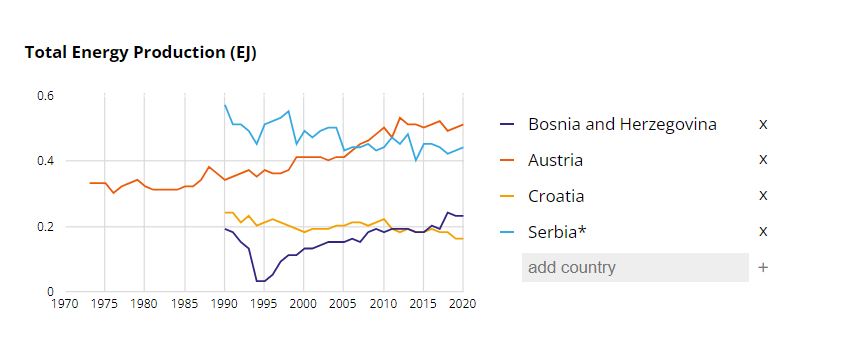

Što se tiče diverzifikacije izvora energije u TESu, najvažniji primarni izvori energije su ugalj sa 53%, naftni derivati sa 22,6%, te biogoriva i otpad sa 17,1% hidropotencijal sa 7,2%. Udio OIE je 24,6%.

Kada je riječ o uvozu energetskih proizvoda, to su najvećim dijelom naftni derivati, ugalj, prirodni gas. Od sekundarnih izvora, može se primijetiti da BiH izvozi skoro dvostruko više električne energije nego što je uvozi. Male količine naftnih derivata se koriste u međunarodnom avionskom saobraćaju, dok energetske rezerve čine ugalj, sirova nafta, naftni derivati, dok ne postoje rezerve prirodnog gasa.
Statistička razlika je prisutna u kategorijama uglja, a nešto veća je u koloni koja se odnosi na sirovu naftu, konverzije jedinica u prvom slučaju, dok veća statistička razlika u drugom slučaju može ukazivati na nepouzdanost prikupljanja podataka.


In [8]:
share_tes=(file.iloc[6,:8]/file.loc[bos_index[6],bos_columns[-1]])*100 #["TES","Ukupno"]

In [9]:
share_tes

Ugalj                            53.575042
Sirova nafta                      1.067094
Naftni derivati                  22.570062
Prirodni gas                      2.577200
Nuklearna energija                0.000000
Hidro                             7.191668
Vjetro-,solarna energija itd.     0.334633
Biogoriva i otpad                17.092817
Name: TES, dtype: float64

In [10]:
oie_share=share_tes[5:8].sum()
print("Udio OIE u TES:",oie_share,"%")

Udio OIE u TES: 24.619117314813906 %


<AxesSubplot:ylabel='TES'>

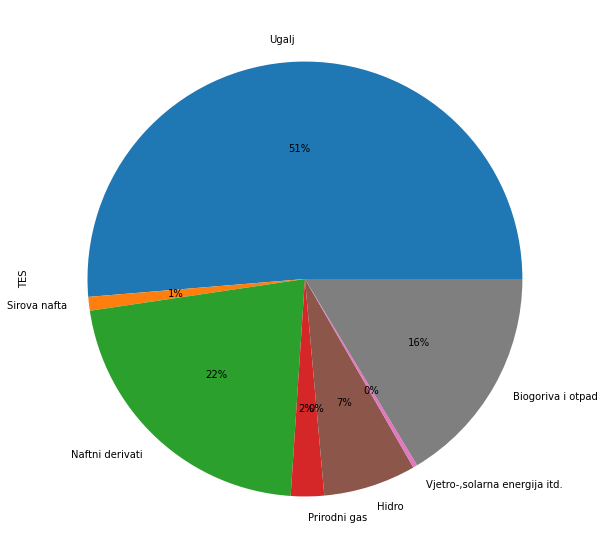

In [11]:
share_tes.plot(kind="pie",autopct='%1.0f%%',figsize=(15,10))

Biomasa čini 116% ukupne primarne energije biomase, što znači da od ukupno proizvedene jedan dio ide na izvoz,dok je uvoz veoma mali. Proizvedena količina uglja pokriva 87% ukupne količine, s tim što se ugalj i uvozi i izvozi, dok se država u slučaju nafte i prirodnog gasa u potpunosti oslanja na uvoz.  

In [12]:
production_tes_ratio=(file.iloc[0,:8]/file.iloc[6,:8])*100

In [13]:
production_tes_ratio

Ugalj                             87.066610
Sirova nafta                            NaN
Naftni derivati                         NaN
Prirodni gas                            NaN
Nuklearna energija                      NaN
Hidro                            100.000000
Vjetro-,solarna energija itd.    100.000000
Biogoriva i otpad                116.554604
dtype: float64

In [14]:
# procenat uglja koji se uvozi u odnosu na proizvedenu
(file.iloc[1,0]/file.iloc[0,0])*100

33.03290023234429

Text(0.5, 0, 'Resurs')

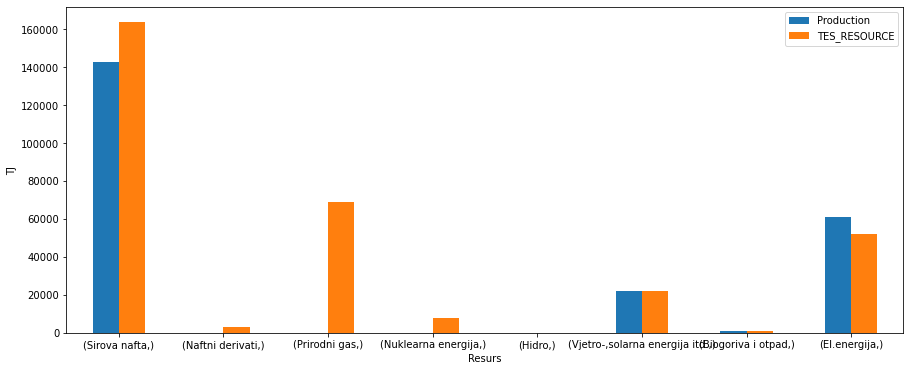

In [15]:
production = file.iloc[0,:8].values
TES_RESOURCE = file.iloc[6,:8].values
index = [file.columns[1:9]]
df = pd.DataFrame({'Production': production,
                   'TES_RESOURCE': TES_RESOURCE}, index=index)
ax = df.plot.bar(rot=0, figsize=(15,6))
ax.set_ylabel("TJ")
ax.set_xlabel("Resurs")

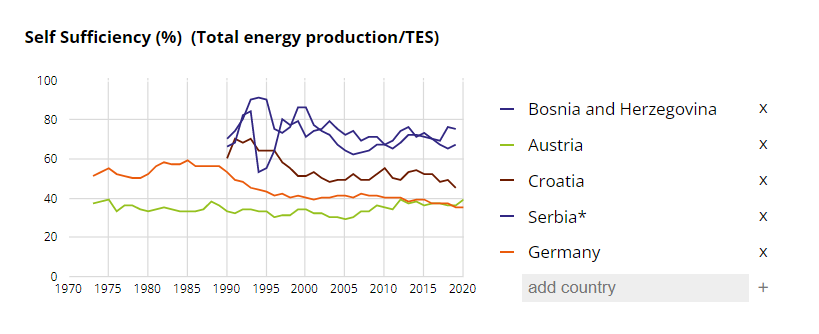

Ovisnost uvoza energije

In [16]:
en_dep=((file.loc[bos_index[1],bos_columns[-1]]-abs(file.loc[bos_index[2],bos_columns[-1]]))/(file.loc[bos_index[6],bos_columns[-1]]))*100
print(en_dep,"%")

28.14488112662037 %


In [17]:
oil_dep=(((np.nan_to_num(file.loc[bos_index[1],bos_columns[1]])+file.loc[bos_index[1],bos_columns[2]])-abs((np.nan_to_num(file.loc[bos_index[2],bos_columns[1]])+file.loc[bos_index[2],bos_columns[2]])))/(file.loc[bos_index[6],bos_columns[1]]+file.loc[bos_index[6],bos_columns[2]]))*100
print(oil_dep,"%")

89.22703975619892 %


## Transformacija

In [18]:
file_tr=file.transpose()

Udio TES u potrošnji  elektrana za konverziju u električnu energiju :

In [19]:
#total_resour=file.loc["Electricity plants",['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
       #'Wind, solar,etc', 'Biofuels and waste']].sum()

total_resour=file.loc[bos_index[9],bos_columns[:8]].sum()

#resources_el_plants=(file_tr.loc[['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
      # 'Wind, solar,etc', 'Biofuels and waste'],"Electricity plants"]/total_resour)*100

resources_el_plants=(file_tr.loc[bos_columns[:8],bos_index[9]]/total_resour)*100



print(resources_el_plants,"%")

Ugalj                            83.883114
Sirova nafta                           NaN
Naftni derivati                   0.341313
Prirodni gas                      0.163884
Nuklearna energija               -0.000000
Hidro                            14.874209
Vjetro-,solarna energija itd.     0.692107
Biogoriva i otpad                 0.045373
Name: Elektrane, dtype: float64 %


Prosječna efikasnost elektrana u kojima se proizvodi električna energija je:

In [20]:
#electrictiy_plants_eff=(file.loc["Electricity plants","Electricity"]/abs(file.loc["Electricity plants",['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
      # 'Wind, solar,etc', 'Biofuels and waste']].sum()))*100


electrictiy_plants_eff=(file.loc[bos_index[9],bos_columns[8]]/abs(file.loc[bos_index[9],bos_columns[:8]].sum()))*100
print(electrictiy_plants_eff,"%")

41.96187315883926 %


Efikasnost CHP elektrana - po podacima iz energetskog bilansa koriste samo ugalj i malim dijelom biogoriva.

In [21]:
#CHP_plants_eff_el=(file.loc["CHP plants","Electricity"]/abs(file.loc["CHP plants",'Coal']+file.loc["CHP plants",'Biofuels and waste'])*100)
#CHP_plants_eff_term=(file.loc["CHP plants","Heat"]/abs(file.loc["CHP plants",'Coal']+file.loc["CHP plants",'Biofuels and waste'])*100)
#total_CHP_eff=(file.loc["CHP plants","Electricity"]+file.loc["CHP plants","Heat"])/abs(file.loc["CHP plants",'Coal']+file.loc["CHP plants",'Biofuels and waste'])*100


CHP_plants_eff_el=(file.loc[bos_index[10],bos_columns[8]]/abs(file.loc[bos_index[10],bos_columns[0]]+file.loc[bos_index[10],bos_columns[7]])*100)
print(CHP_plants_eff_el,"% electrical efficiency")

CHP_plants_eff_term=(file.loc[bos_index[10],bos_columns[9]]/abs(file.loc[bos_index[10],bos_columns[0]]+file.loc[bos_index[10],bos_columns[7]])*100)
print(CHP_plants_eff_term,"% thermal efficiency")

total_CHP_eff=(file.loc[bos_index[10],bos_columns[8]]+file.loc[bos_index[10],bos_columns[9]])/abs(file.loc[bos_index[10],bos_columns[0]]+file.loc[bos_index[10],bos_columns[7]])*100
print(total_CHP_eff,"% total efficiency")

21.164613661814112 % electrical efficiency
47.25643896976484 % thermal efficiency
68.42105263157895 % total efficiency


Udio OIE u električnoj energiji:

In [22]:
#RES=(abs(file.loc["Electricity plants",["Hidro",
      # 'Wind, solar,etc', 'Biofuels and waste']].sum())/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity"]))*100

RES=(abs(file.loc[bos_index[9],bos_columns[5:8]].sum())/(file.loc[bos_index[9],bos_columns[8]]+file.loc[bos_index[10],bos_columns[8]]))*100
print(RES,"%")     

36.756006951641446 %


Udio hidropotencijala u električnoj energiji:

In [23]:
#hydro=(abs(file.loc["Electricity plants","Hidro"])/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity"]))*100  


hydro=(abs(file.loc[bos_index[9],bos_columns[5]])/(file.loc[bos_index[9],bos_columns[8]]+file.loc[bos_index[10],bos_columns[8]]))*100
print(hydro,"%")    

35.01969100272645 %


Udio CHP i toplana u proizvedenoj toploti

In [24]:
#heat_share=(file_tr.loc["Heat",["Heat plants","CHP plants"]]/file_tr.loc["Heat",["Heat plants","CHP plants"]].sum())*100

heat_share=(file_tr.loc[bos_columns[9],bos_index[10:12]]/file_tr.loc[bos_columns[9],bos_index[10:12]].sum())*100
print(heat_share,"%")  

TJ
CHP elektrane    30.299767
Toplane          69.700233
Name: Toplota, dtype: float64 %


Konverzija energije goriva u toplotu u toplanama:

In [25]:
#heat_plants_conv=(file.loc["Heat plants","Heat"]/abs(file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']].sum()))*100
def findElements(lst1, lst2):
    return [lst1[i] for i in lst2]
lst1=bos_columns
lst2=[0,3,7]
heat_plants_conv=(file.loc[bos_index[11],bos_columns[9]]/abs(file.loc[bos_index[11],findElements(lst1,lst2)].sum()))*100
print(heat_plants_conv,"%")    

71.39179996322854 %


Udio goriva u toplanama:

In [26]:
#(file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']]/file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']].sum())*100
lst1=bos_columns
lst2=[0,3,7]

(file.loc[bos_index[11],findElements(lst1,lst2)]/file.loc[bos_index[11],findElements(lst1,lst2)].sum())*100


Ugalj                43.188086
Prirodni gas         32.009561
Biogoriva i otpad    24.802353
Name: Toplane, dtype: float64

<AxesSubplot:ylabel='Toplane'>

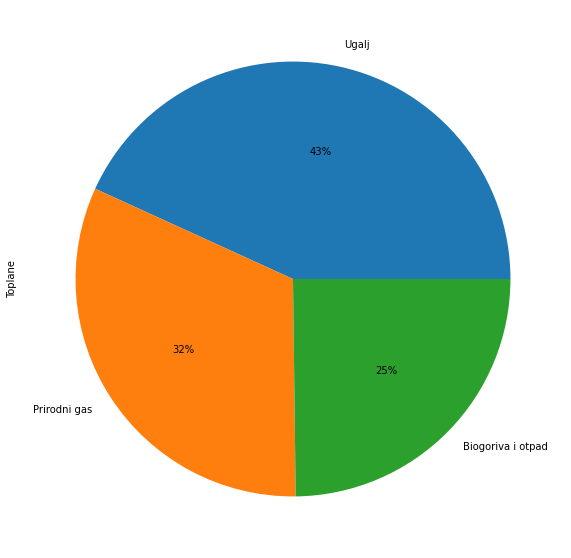

In [27]:
((file.loc[bos_index[11],findElements(lst1,lst2)]/file.loc[bos_index[11],findElements(lst1,lst2)].sum())*100).plot(kind="pie",autopct='%1.0f%%',figsize=(15,10))

Vlastita upotreba:

In [28]:
#energy_own_use=((file.loc["Heat plants",['Coal', 'Oil products',
      # "Electricity","Heat"]])/file.loc["Energy industry own use","Total"])*100


lst3=[0,2,8,9]

energy_own_use=((file.loc[bos_index[17],findElements(lst1,lst3)])/file.loc[bos_index[17],bos_columns[-1]])*100
energy_own_use 

Ugalj              48.155064
Naftni derivati    13.183448
El.energija        38.504631
Toplota             0.156857
Name: Vlastita potrošnja, dtype: float64

Gubici - prenos i distribucija

In [29]:
#losses_el=(abs(file.loc["Losses","Electricity"])/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity",]))*100


losses_el=(abs(file.loc[bos_index[18],bos_columns[8]])/(file.loc[bos_index[9],bos_columns[8]]+file.loc[bos_index[10],bos_columns[8]]))*100
print(losses_el,"%")  

7.21471962244296 %


In [30]:
#losses_heat=(abs(file.loc["Losses","Heat"])/(file.loc["Heat plants","Heat"]+file.loc["CHP plants","Heat",]))*100

losses_heat=(abs(file.loc[bos_index[18],bos_columns[9]])/(file.loc[bos_index[10],bos_columns[9]]+file.loc[bos_index[11],bos_columns[9]]))*100
print(losses_heat,"%")  

7.5749416621791426 %


## TFC

Finalna potrošnja energije se  ogleda kroz četiri glavna sektora: industrija, saobraćaj, stambeni sektor i sektor uslužnih i javnih djelatnosti. Potrošnja resursa u neeenergetske svrhe čini 2,1% ukupne potrošnje. 

U svim sektorima izuzev saobraćaja, značajna je potrošnja električne energije.Sektor industrije se značajnim dijelom oslanja na ugalj, naftne derivate i prirodni gas, dok je u stambenom sektoru prisutan značajn udio biogoriva (39%) za proizvodnju toplote, s obzirom na nizak nivo domaćinstava koji se sanbdijevaju toplotom putem sistema daljinskog grijanja. Drugi značajn izvor energije za domaćinstva je električna energija (35%) , koja se osim za uobičajene dnevne potrebe koristi jednim dijelom i za snabdijevanje toplotom.


Što se tiče potrošnje energije, najveći potrošač finalne energije je stambeni sektor, pri čemu najveći udio u potrošnji imaju biogoriva sa 64%,električna energija sa 24% i toplotna energija. Ovdje je važno napomenuti da se biogoriva u najvećoj mjeri koriste za snabdjevanje toplotom zbog malog procenta stanovnika priključenih na sisteme daljinskog grijanja. Nakon toga, najveću potrošnju finalne energije bilježi sektor transporta koji se uglavnom oslanja na naftne derivate. Sektor industrije troši više resursa, ugalj, naftne derivate, prirodni gas i električnu energiju koja je najdominantnija - 43%. 

Sektor uslužnih djelatnosti najviše troši električnu energiju (52%), dok se potrošnja ostalih resursa može uglavnom pripisati energentima za grijanje prostora.

Text(0.5, 0, 'TJ')

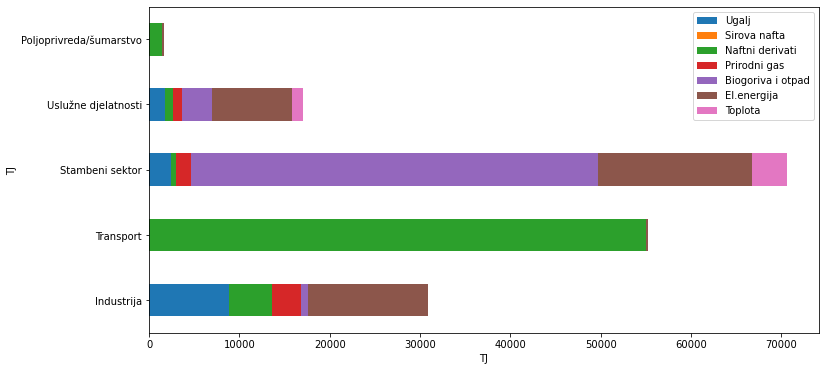

In [31]:
#file[["Coal","Crude oil","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]][20:25].plot(kind="barh",stacked=True,figsize=(12,6))
lst4=[0,1,2,3,7,8,9]

file[findElements(lst1,lst4)][20:25].plot(kind="barh",stacked=True,figsize=(12,6))
plt.xlabel("TJ")


<AxesSubplot:ylabel='Poljoprivreda/šumarstvo'>

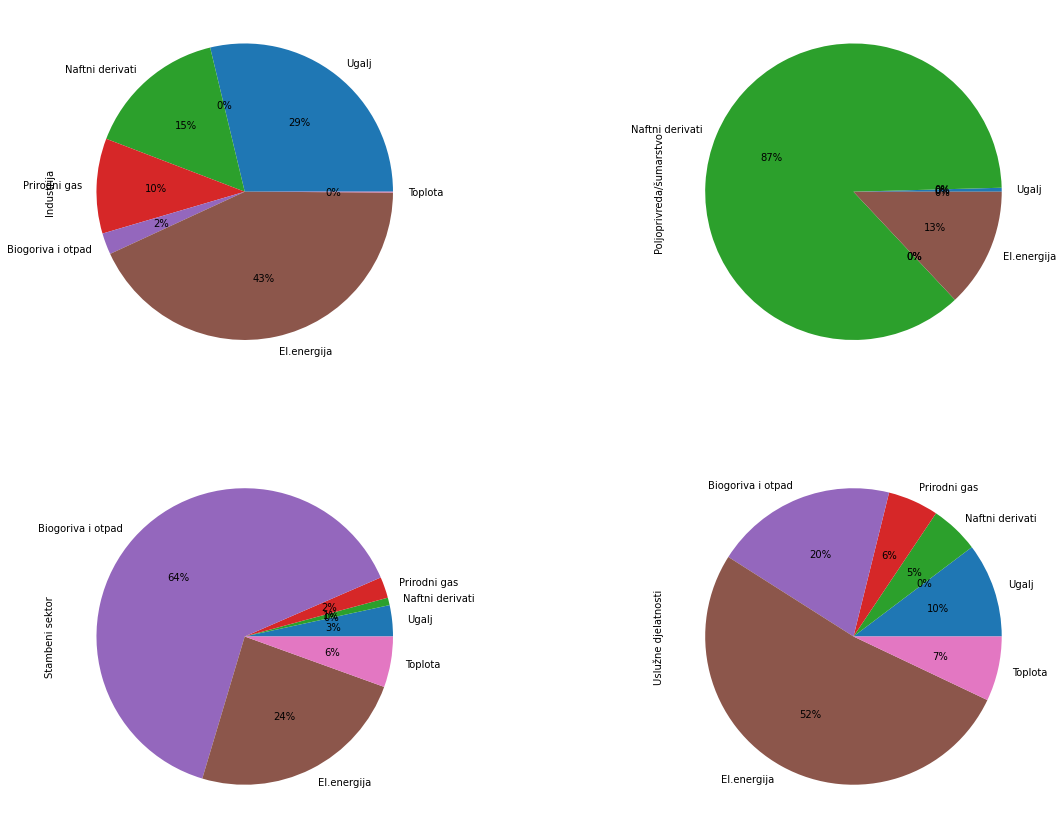

In [32]:
#industry_fuel=(file.loc["Industry",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Industry","Total"])*100
#transport_fuel=(file.loc["Transport",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Transport","Total"])*100
#residential_fuel=(file.loc["Residential",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Resid","Total"])*100
#commercial_fuel=(file.loc['Commercial and public services',["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Comm","Total"])*100


fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,15))

industry_fuel=(file.loc[bos_index[20],findElements(lst1,lst4)]/file.loc[bos_index[20],bos_columns[-1]])*100
industry_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,0])

#transport_fuel=(file.loc[bos_index[21],findElements(lst1,lst4)]/file.loc[bos_index[21],bos_columns[-1]])*100
#transport_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,1])


residential_fuel=(file.loc[bos_index[22],findElements(lst1,lst4)]/file.loc[bos_index[22],bos_columns[-1]])*100
residential_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,0])

commercial_fuel=(file.loc[bos_index[23],findElements(lst1,lst4)]/file.loc[bos_index[23],bos_columns[-1]])*100
commercial_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,1])


agric_fuel=(file.loc[bos_index[24],findElements(lst1,lst4)]/file.loc[bos_index[24],bos_columns[-1]])*100
agric_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,1])

U finalnoj potrošnji, najveće je učešće naftnih derivata, koji se najviše koriste u saobraćaju (90%) i u industriji sa 8% učešća. Nakon toga slijede biogoriva, gdje u finalnoj potrošnji najviše učestvuje stambeni sektor (92%), te električna energija u kojem stambeni sektor učestvuje sa 43%, dok industrija zauzima 34%. Ostalo čine sektor uslužnih djelatnosti i drugi. Najmanja potrošnja se odnosi na gas, radi cijene. Što se tiče uglja, tu je svakako naveći potrošač industrija sa 68%.

Text(0.5, 0, 'TJ')

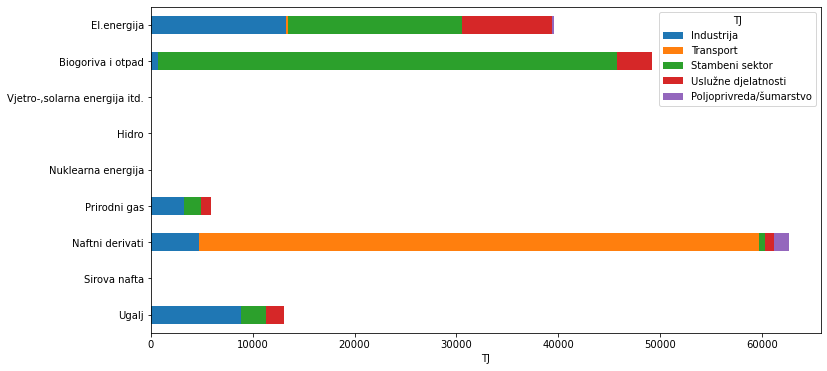

In [33]:
#file_tr[['Industry', 'Transport', 'Residential',
      # 'Commercial and public services', 'Agriculture/forestry']][:9].plot(kind="barh",stacked=True,figsize=(12,6))

file_tr[bos_index[20:25]][:9].plot(kind="barh",stacked=True,figsize=(12,6))
plt.xlabel("TJ")

<AxesSubplot:ylabel='Toplota'>

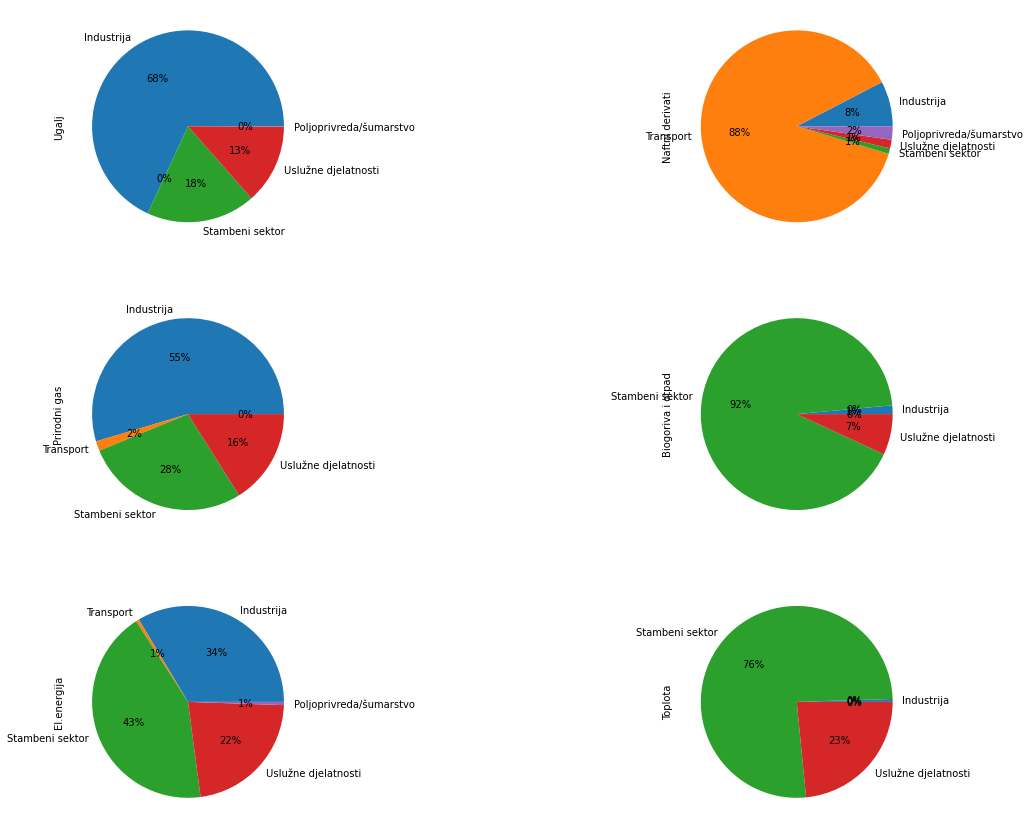

In [34]:
#coal_sector=(file_tr.loc["Coal",['Industry', 'Transport', 'Residential',
     #  'Commercial and public services']]/file_tr.loc["Coal","Total final consumption"])*100
#oil_sector=(file_tr.loc["Oil products",['Industry', 'Transport', 'Residential',
     #  'Commercial and public services']]/file_tr.loc["Oil products","Total final consumption"])*100
#gas_sector=(file_tr.loc["Natural gas",['Industry', 'Transport', 'Residential',
      # 'Commercial and public services']]/file_tr.loc["Natural gas","Total final consumption"])*100
#biofuels_sector=(file_tr.loc['Biofuels and waste',['Industry', 'Transport', 'Residential',
     #  'Commercial and public services']]/file_tr.loc['Biofuels and waste',"Total final consumption"])*100
#electricity_sector=(file_tr.loc["Electricity",['Industry', 'Transport', 'Residential',
      # 'Commercial and public services']]/file_tr.loc["Electricity","Total final consumption"])*100
#heat_sector=(file_tr.loc["Heat",['Industry', 'Transport', 'Residential',
     #  'Commercial and public services']]/file_tr.loc["Heat","Total final consumption"])*100


fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(20,15))


coal_sector=(file_tr.loc[bos_columns[0],bos_index[20:25]]/file_tr.loc[bos_columns[0],bos_index[19]])*100
coal_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,0])

oil_sector=(file_tr.loc[bos_columns[2],bos_index[20:25]]/file_tr.loc[bos_columns[2],bos_index[19]])*100
oil_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,1])


gas_sector=(file_tr.loc[bos_columns[3],bos_index[20:25]]/file_tr.loc[bos_columns[3],bos_index[19]])*100
gas_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,0])

biofuels_sector=(file_tr.loc[bos_columns[7],bos_index[20:25]]/file_tr.loc[bos_columns[7],bos_index[19]])*100
biofuels_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,1])

electricity_sector=(file_tr.loc[bos_columns[8],bos_index[20:25]]/file_tr.loc[bos_columns[8],bos_index[19]])*100
electricity_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[2,0])

heat_sector=(file_tr.loc[bos_columns[9],bos_index[20:25]]/file_tr.loc[bos_columns[9],bos_index[19]])*100
heat_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[2,1])


Potrošnja naftnih derivata iznosi preko 60 000 TJ.

## Ostali indikatori

Prema zadnjem popisu stanovništva, BiH ima 3 531 159 stanovnika. Na osnovu ovoga se može izračunati indikator TPES/CAPITA. Ovaj indikator je uvjetovan smanjenjem populacije sa jedne strane, te velikim udjelom fosilnih goriva u ukupno dostupnoj primanojr energiji.

In [35]:
TPES_CAPITA=file.loc["TES",bos_columns[-1]]/3531159 #["tes","total"]
print("TPES/CAPITA:",TPES_CAPITA,"TJ/st.") #86GJ/st.

TPES/CAPITA: 0.08648973325755085 TJ/st.


http://energyatlas.iea.org/#!/tellmap/-297203538/0

In [36]:
TPES_GDP=file.loc["TES",bos_columns[-1]]/(36527050*0.58) #$ #["tes","total"]
print("TPES/GDP:",TPES_GDP,"TJ/$") #14,4GJ/GDP

TPES/GDP: 0.014415816261628309 TJ/$


In [37]:
ELECT_CONSUM_CAPITA=file.loc[bos_index[19],bos_columns[8]]/3531159 #["Total final consumption","Electricity"]
print("Electricity per capita:",ELECT_CONSUM_CAPITA,"TJ/st.") #11,2GJ/st

Electricity per capita: 0.011207368458911083 TJ/st.


In [38]:
comparison1=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="CO2 intensity of energy mix",nrows=6)
comparison1.columns=[' (CO2/TES), TCO2/TJ\n',"BiH","EU","Hrvatska","Srbija","Austrija","Slovenija","Švedska","Njemačka"]

comparison2=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="El consumption per capita",nrows=6)
comparison2.columns=["MWh/capita","BiH","EU","Hrvatska","Srbija","Austrija","Slovenija","Švedska","Njemačka"]

comparison3=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="Total CO2 EMISSIONS",nrows=6)
comparison3.columns=[' MtCO2',"BiH","EU","Hrvatska","Srbija","Austrija","Slovenija","Švedska","Njemačka"]


comparison4=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="TES per GDP ",nrows=5)
comparison4.columns=['GJ/1000 2015 USD',"BiH","EU","Hrvatska","Srbija","Austrija","Slovenija","Švedska","Njemačka"]

comparison5=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="CO2 Emissions per capita",nrows=5)
comparison5.columns=['tCO2/capita',"BiH","EU","Hrvatska","Srbija","Austrija","Slovenija","Švedska","Njemačka"]

Text(0, 0.5, '$t_{CO2}/capita$')

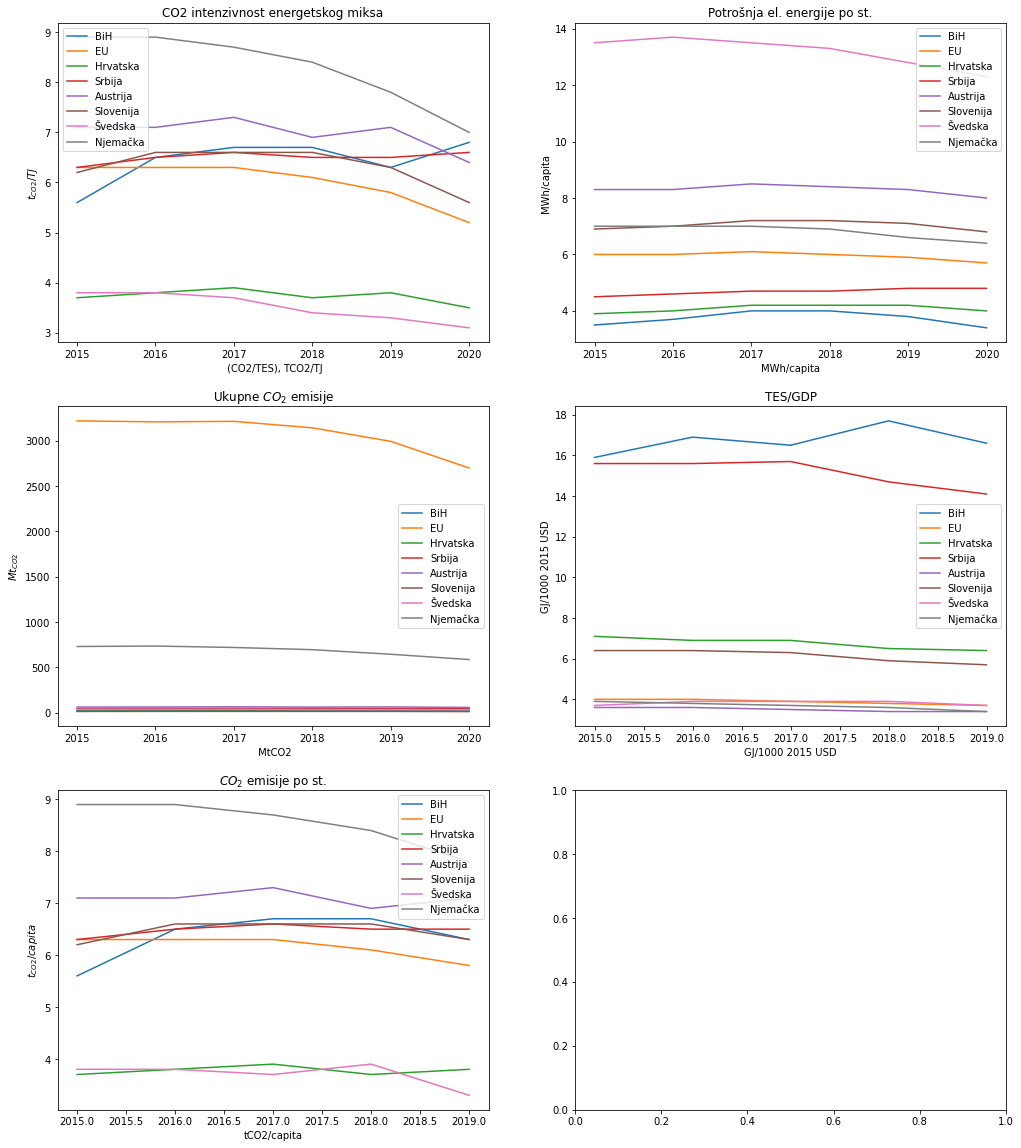

In [39]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(17,20))

comparison1.set_index(' (CO2/TES), TCO2/TJ\n').plot(ax=ax[0,0])
ax[0,0].set_title("CO2 intenzivnost energetskog miksa")
ax[0,0].set_ylabel("$t_{CO2}/TJ$")

comparison2.set_index("MWh/capita").plot(ax=ax[0,1])
ax[0,1].set_title("Potrošnja el. energije po st.")
ax[0,1].set_ylabel("MWh/capita")

comparison3.set_index(' MtCO2').plot(ax=ax[1,0])
ax[1,0].set_title("Ukupne $CO_{2}$ emisije")
ax[1,0].set_ylabel("$Mt_{CO2}$")

comparison4.set_index('GJ/1000 2015 USD').plot(ax=ax[1,1])
ax[1,1].set_title("TES/GDP")
ax[1,1].set_ylabel('GJ/1000 2015 USD')

comparison5.set_index('tCO2/capita').plot(ax=ax[2,0])
ax[2,0].set_title("$CO_{2}$ emisije po st.")
ax[2,0].set_ylabel('$t_{CO2}/capita$')